In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/content/drive/MyDrive/data/penguins.csv',index_col=0)

In [3]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
1,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
2,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
3,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
4,Adelie,Torgersen,39.3,20.6,190,3650,male,2007
...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male,2009
329,Chinstrap,Dream,43.5,18.1,202,3400,female,2009
330,Chinstrap,Dream,49.6,18.2,193,3775,male,2009
331,Chinstrap,Dream,50.8,19.0,210,4100,male,2009


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 332
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 23.4+ KB


In [5]:
y=data['species']

In [6]:
y


0         Adelie
1         Adelie
2         Adelie
3         Adelie
4         Adelie
         ...    
328    Chinstrap
329    Chinstrap
330    Chinstrap
331    Chinstrap
332    Chinstrap
Name: species, Length: 333, dtype: object

In [7]:
y.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [41]:
y=y.map({'Adelie':0,'Gentoo':1,'Chinstrap':2})

In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
328    2
329    2
330    2
331    2
332    2
Name: species, Length: 333, dtype: int64

In [10]:
X=data.drop(columns='species')


In [11]:
X

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Torgersen,39.1,18.7,181,3750,male,2007
1,Torgersen,39.5,17.4,186,3800,female,2007
2,Torgersen,40.3,18.0,195,3250,female,2007
3,Torgersen,36.7,19.3,193,3450,female,2007
4,Torgersen,39.3,20.6,190,3650,male,2007
...,...,...,...,...,...,...,...
328,Dream,55.8,19.8,207,4000,male,2009
329,Dream,43.5,18.1,202,3400,female,2009
330,Dream,49.6,18.2,193,3775,male,2009
331,Dream,50.8,19.0,210,4100,male,2009


In [12]:
data_encoded= pd.get_dummies(X,columns=['island','sex'])
X=data_encoded

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [14]:
x_test,x_train,y_test,y_train=train_test_split(X,y,test_size=0.3)

In [15]:
X.shape ,x_train.shape,x_test.shape ,y_train.shape,y_test.shape


((333, 10), (100, 10), (233, 10), (100,), (233,))

In [16]:
forest_classifier=RandomForestClassifier(n_estimators=100,criterion='entropy')

In [17]:
forest_classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [18]:
forest_classifier.score(x_train,y_train)

1.0

In [19]:
forest_classifier.score(x_test,y_test)

0.9914163090128756

In [20]:
decision = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy', random_state=3)

In [21]:
decision.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=3)

In [22]:
decision.score(x_train,y_train)

0.97

In [23]:
decision.score(x_test,y_test)

0.9484978540772532

[Text(0.5555555555555556, 0.875, 'x[2] <= 207.0\nentropy = 1.54\nsamples = 100\nvalue = [39, 39, 22]'),
 Text(0.3333333333333333, 0.625, 'x[0] <= 44.2\nentropy = 0.948\nsamples = 60\nvalue = [38, 0, 22]'),
 Text(0.2222222222222222, 0.375, 'x[1] <= 17.35\nentropy = 0.378\nsamples = 41\nvalue = [38, 0, 3]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.881\nsamples = 10\nvalue = [7, 0, 3]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 19\nvalue = [0, 0, 19]'),
 Text(0.7777777777777778, 0.625, 'x[5] <= 0.5\nentropy = 0.169\nsamples = 40\nvalue = [1, 39, 0]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.0\nsamples = 39\nvalue = [0, 39, 0]')]

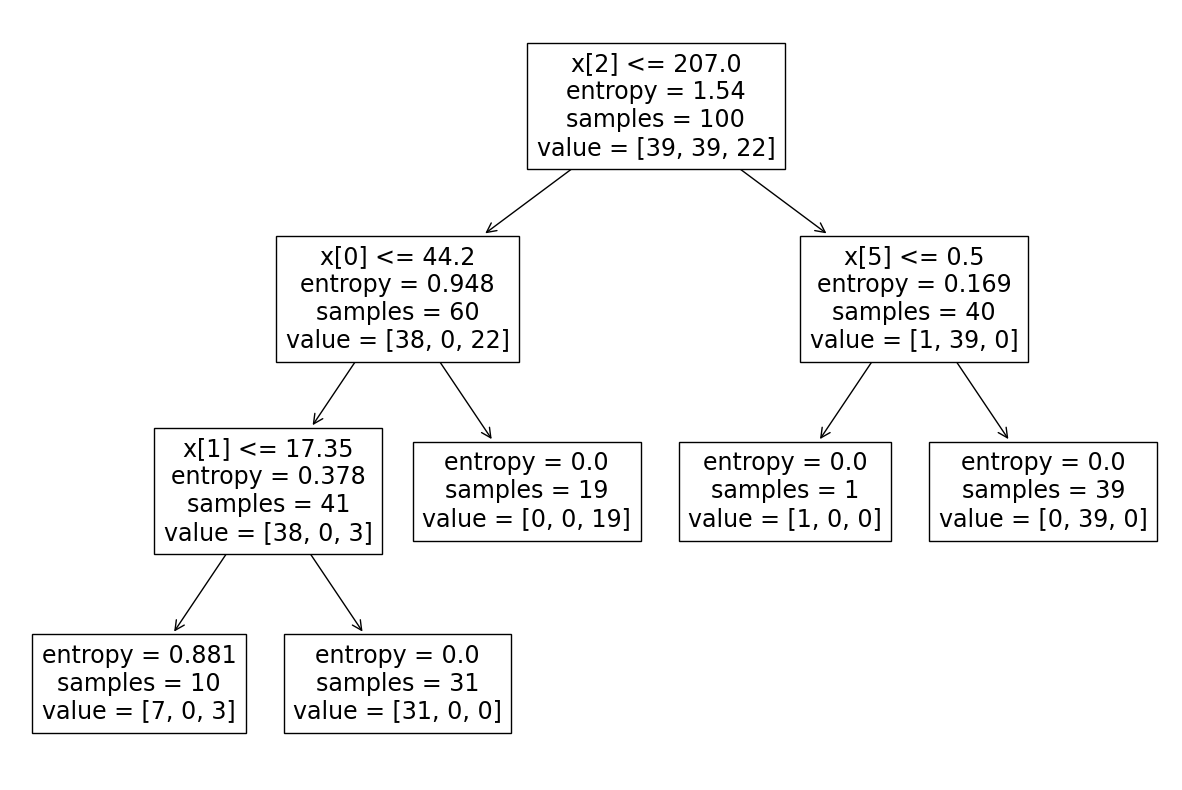

In [24]:
plt.figure(figsize=(15,10))
tree.plot_tree(decision)

In [25]:
forest_classifier.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=525682852),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=781874661),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1851120866),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=2112753188),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=2088242698),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1042663976),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=704574321),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1796574152),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
         

[Text(0.6, 0.9166666666666666, 'x[0] <= 43.0\nentropy = 1.552\nsamples = 70\nvalue = [41, 35, 24]'),
 Text(0.4, 0.75, 'x[2] <= 205.0\nentropy = 0.602\nsamples = 28\nvalue = [41, 2, 3]'),
 Text(0.3, 0.5833333333333334, 'x[0] <= 40.75\nentropy = 0.359\nsamples = 26\nvalue = [41, 0, 3]'),
 Text(0.2, 0.4166666666666667, 'entropy = 0.0\nsamples = 19\nvalue = [35, 0, 0]'),
 Text(0.4, 0.4166666666666667, 'x[0] <= 41.15\nentropy = 0.918\nsamples = 7\nvalue = [6, 0, 3]'),
 Text(0.2, 0.25, 'x[2] <= 185.5\nentropy = 0.918\nsamples = 2\nvalue = [1, 0, 2]'),
 Text(0.1, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.3, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 2]'),
 Text(0.6, 0.25, 'x[6] <= 0.5\nentropy = 0.65\nsamples = 5\nvalue = [5, 0, 1]'),
 Text(0.5, 0.08333333333333333, 'entropy = 0.0\nsamples = 4\nvalue = [5, 0, 0]'),
 Text(0.7, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.5833333333333334, 'entropy

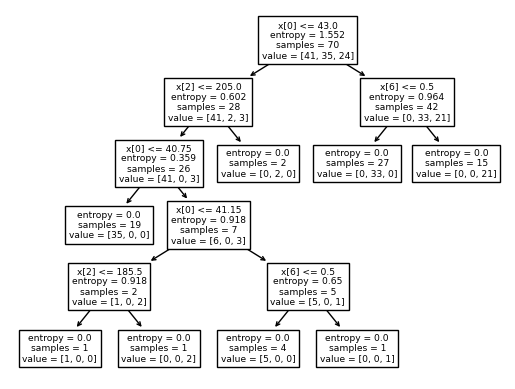

In [26]:
tree.plot_tree(forest_classifier.estimators_[0])

[Text(0.5555555555555556, 0.9, 'x[3] <= 4512.5\nentropy = 1.547\nsamples = 66\nvalue = [40, 37, 23]'),
 Text(0.3333333333333333, 0.7, 'x[1] <= 15.0\nentropy = 1.263\nsamples = 42\nvalue = [39, 5, 23]'),
 Text(0.2222222222222222, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 5, 0]'),
 Text(0.4444444444444444, 0.5, 'x[8] <= 0.5\nentropy = 0.951\nsamples = 38\nvalue = [39, 0, 23]'),
 Text(0.2222222222222222, 0.3, 'x[0] <= 45.6\nentropy = 0.691\nsamples = 16\nvalue = [22, 0, 5]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [22, 0, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.6666666666666666, 0.3, 'x[0] <= 40.7\nentropy = 0.999\nsamples = 22\nvalue = [17, 0, 18]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [17, 0, 0]'),
 Text(0.7777777777777778, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 18]'),
 Text(0.7777777777777778, 0.7, 'x[2] <= 203.5\nentropy = 0.196\nsamples = 24\nvalue = [1

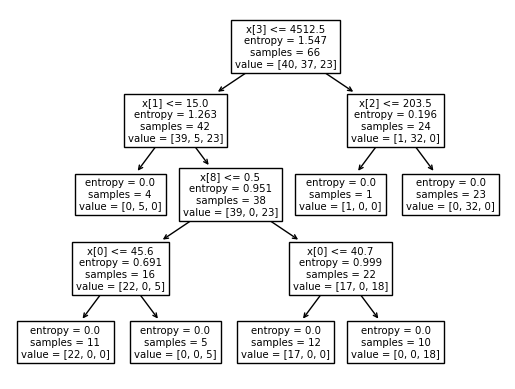

In [27]:
tree.plot_tree(forest_classifier.estimators_[1])

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 332
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     333 non-null    float64
 1   bill_depth_mm      333 non-null    float64
 2   flipper_length_mm  333 non-null    int64  
 3   body_mass_g        333 non-null    int64  
 4   year               333 non-null    int64  
 5   island_Biscoe      333 non-null    bool   
 6   island_Dream       333 non-null    bool   
 7   island_Torgersen   333 non-null    bool   
 8   sex_female         333 non-null    bool   
 9   sex_male           333 non-null    bool   
dtypes: bool(5), float64(2), int64(3)
memory usage: 17.2 KB


In [50]:
pred =forest_classifier.predict([[39.1,18.7,181,3750,2007,0,0,1,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [51]:
pred=pd.Series(pred)

In [52]:
pred=pred.map({0:'Adelie',1:'Gentoo',2:'Chinstrap'})

In [54]:
pred

0    Adelie
dtype: object

In [75]:
import pickle

In [76]:
filename= 'Decision_forest.pkl'
pickle.dump(forest_classifier,open(filename,'wb'))

In [77]:
loaded_model=pickle.load(open(filename,'rb'))

In [78]:
result = loaded_model.score(x_test,y_test)

In [79]:
result

0.9914163090128756

In [80]:
pred_model=loaded_model.predict([[39.1,18.7,181,3750,2007,0,0,1,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [81]:
pred_model=pd.Series(pred_model)

In [82]:
pred_model=pred_model.map({0:'Adelie',1:'Gentoo',2:'Chinstrap'})

In [83]:
pred_model

0    Adelie
dtype: object